In [13]:
# 
# import required fast_arrow API resources
# 
from fast_arrow import (
    Auth,
    OptionChain,
    Option,
    OptionPosition,
    OptionMarketdata,
)

In [38]:
# 
# import other libraries
# 
import pandas as pd
import json
import configparser
import seaborn as sns
from matplotlib import pyplot as plt

# 
# configure matplot lib for rendering in jupyter notebooks
# 
%matplotlib inline


# 
# hide the warnings so the graphs 
import warnings
warnings.filterwarnings('ignore')

In [39]:
config_file = "../config.debug.ini"
config = configparser.ConfigParser()
config.read(config_file)
username = config['account']['username']
password = config['account']['password']

In [40]:
# 
# authenticate and fetch a bearer token
# 
bearer = Auth.login_oauth2(username, password)

In [41]:
# 
# lets fetch all option positions
# 
all_option_positions = OptionPosition.all(bearer)
ops = list(filter(lambda p: float(p["quantity"]) > 0.0, all_option_positions))

In [42]:
# 
# merge in 
# - market data (delta, theta, vega, etc)
# - instrument data (price, ask_price, bid price, option interest, etc)
# 
ops = OptionPosition.mergein_marketdata_list(bearer, ops)
ops = OptionPosition.mergein_instrumentdata_list(bearer, ops)

In [43]:
# 
# humanize the data (ie, make short positions have negative numbers)
# 
ops = OptionPosition.humanize_numbers(ops)

In [44]:
df = pd.DataFrame.from_dict(ops)

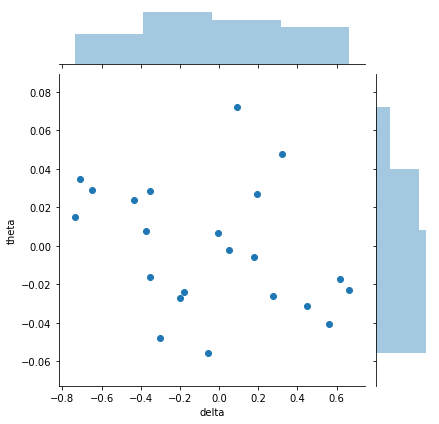

In [45]:
# 
# join plot of Theta vs Delta
# 
sns.jointplot(x="delta", y="theta", data=df);

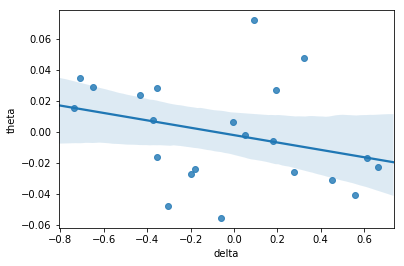

In [46]:
sns.regplot(x="delta", y="theta", data=df)